# Project description

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue. You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

# Description of the data
1. Data used in the first part of the project
`/datasets/hypotheses_us.csv`
* `Hypotheses` — brief descriptions of the hypotheses
* `Reach` — user reach, on a scale of one to ten
* `Impact` — impact on users, on a scale of one to ten
* `Confidence` — confidence in the hypothesis, on a scale of one to ten
* `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

2. Data used in the second part of the project
`/datasets/orders_us.csv`
* `transactionId` — order identifier
* `visitorId` — identifier of the user who placed the order
* `date` — of the order
* `revenue` — from the order
* `group` — the A/B test group that the user belongs to `/datasets/visits_us.csv`
* `date` — date
* `group` — A/B test group
* `visits` — the number of visits on the date specified in the A/B test group specified

Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group
A and group B.

# Part 1. Prioritizing Hypotheses
The file `hypotheses_us.csv` contains nine hypotheses on boosting an online store's revenue with `Reach` , `Impact` , `Confidence` , and `Effort` specified for each.
The task is to:
* Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
* Show how the prioritization of hypotheses changes when you use RICE instead of ICE . Provide an explanation for the changes.

# Part 2. A/B Test Analysis
You carried out an A/B test and got the results described in the files `orders_us.csv` and `visits_us.csv` .
Analyze the A/B test:
1. Graph cumulative revenue by group. Make conclusions and conjectures.
2. Graph cumulative average order size by group. Make conclusions and conjectures.
3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
7. Plot a scatter chart of order prices. Make conclusions and conjectures.
8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

# Conclusions
 Make a decision based on the test results. The possible decisions are:
     1. Stop the test, consider one of the groups the leader.
     2. Stop the test, conclude that there is no difference between the groups.
     3. Continue the test.
     

## Description of the data

We will import all important libraries such as:
* pandas
* numpy
* matplotlib.pyplot
* scipy.stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

We will try to upload our data as followed:
* `'hypotheses_us.csv'` as `hypotheses`.
* `'visits_us.csv'` as `visits`.
* `orders_us.csv` as `orders`.

### `Hypotheses`

In [2]:
try:
    hypotheses = pd.read_csv('hypotheses_us.csv')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')

In [3]:
hypotheses

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


we cannot see all data in the hypotheses table. Therefore, we will add an extention off columns width set to 400.

In [4]:
pd.set_option('max_colwidth', 400)

In [5]:
hypotheses

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6
1,Launch your own delivery service. This will shorten delivery time;2;5;4;10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;8;3;7;3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly;8;3;3;8
4,Change the background color on the main page. This will increase user engagement;3;1;1;1
5,Add a customer review page. This will increase the number of orders;3;2;2;3
6,Show banners with current offers and sales on the main page. This will boost conversion;5;3;8;3
7,Add a subscription form to all the main pages. This will help you compile a mailing list;10;7;8;5
8,Launch a promotion that gives users discounts on their birthdays;1;9;9;5


the columns are separated by `;`. Therefore, we will reupload the data when we will define that the separtion between columns will be`;`.

In [6]:
try:
    hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [7]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [8]:
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [9]:
hypotheses.duplicated().sum()

0

The `hypotheses` table have 5 columns and 9 rows with no missing values and no duplicates. We can change the columns name into lowercase letter to easify our future work.

In [10]:
hypotheses.columns = hypotheses.columns.str.lower()

Now that this table is ready. We can proceed to the next table ` visits`.

### `Visits`

In [11]:
try:
    visits = pd.read_csv('visits_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_us.csv')

In [12]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [14]:
visits.duplicated().sum()

0

In the `visits` table we have 3 columns and 62 rows with no missing values or duplicates. But we have in the `date` column, date variables. We reupload the data while presetting the `date` column as datetime frame variables.


In [15]:
try:
    visits = pd.read_csv('visits_us.csv', parse_dates = ['date'])
except:
    visits = pd.read_csv('/datasets/visits_us.csv', parse_dates = ['date'])

In [16]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


In addition, we can change the columns name into lowercase letters to simplify our futur work.

In [17]:
visits.columns = visits.columns.str.lower()

now let's check general distribution by unique values of the `group` column, counting the total visits per group and per date.

In [18]:
visits['group'].unique()

array(['A', 'B'], dtype=object)

In [19]:
visits.groupby('group')['visits'].sum()

group
A    18736
B    18916
Name: visits, dtype: int64

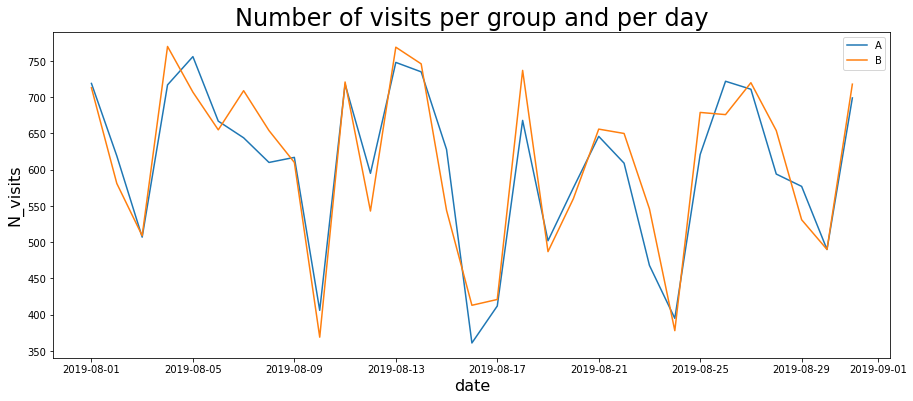

In [20]:
visits.pivot_table(index='group',columns='date',values='visits',aggfunc='sum')
plt.rcParams["figure.figsize"] = (15,6)
plt.title('Number of visits per group and per day', size=24)
plt.plot(visits[(visits['group']=='A')]['date'], visits[(visits['group']=='A')]['visits'], label='A')
plt.plot(visits[(visits['group']=='B')]['date'], visits[(visits['group']=='B')]['visits'], label='B')
plt.xlabel('date', size=16)
plt.ylabel('N_visits', size=16)
plt.legend() 

The distribution between the two group looks almost the same per day with slitly difference in serveral days. We have more visitors from group B.
Now that this data prepared, we can continue tothe next table - `Orders`

### `Orders`

In [21]:
try:
    orders = pd.read_csv('orders_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv')

In [22]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [23]:
orders.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [24]:
orders.duplicated().sum()

0

In the `orders` table, we have5 columns and 1197 row, with no missing values or duplictes. But, like in the previous table, we have a `date` column. So let's reupload the data as datetime frame varilables.

In [25]:
try:
    orders = pd.read_csv('orders_us.csv', parse_dates = ['date'])
except:
    orders = pd.read_csv('/datasets/orders_us.csv', parse_dates = ['date'])

In [26]:
orders.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


Let's change the columns name into lowercase letters to simplify our future analysis.

In [27]:
orders.columns = orders.columns.str.lower()

Now, let's check the distribution of the raw data by counting the transactionID, visitorID and group, their unique ID

In [28]:
orders['transactionid'].count()

1197

In [29]:
orders['transactionid'].nunique()

1197

All transaction are unique.

In [30]:
orders['visitorid'].count()

1197

In [31]:
orders['visitorid'].nunique()

1031

In [32]:
orders['visitorid'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorid, Length: 1031, dtype: int64

Not all visitor are unique. There are users who made several visits. 

In [33]:
orders['group'].count()

1197

In [34]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [35]:
orders.groupby('group')['transactionid'].count()

group
A    557
B    640
Name: transactionid, dtype: int64

In [36]:
orders.groupby('group')['visitorid'].nunique()

group
A    503
B    586
Name: visitorid, dtype: int64

In [37]:
orders[(orders['group']=='A' )&( orders['group']=='B')]['visitorid']

Series([], Name: visitorid, dtype: int64)

We have more transactions from group B than visitors in group B. The same for group A. We suspect that users made more than one transaction in one visit.

Now that all data is prepared, let's continue to prioritizing our hypotheses.

## Prioritizing Hypotheses

To prioritize hypotheses, we have two methods that take in aknowledge the following parameters -
* ICE - the impact and the confidence by the effort.
* RICE - the reach, impact and confidence by effort. 

After finding each result, we will sort them by descending order to check which hypotheses get the highest record.

### ICE 

In [38]:
hypotheses['ICE']=(hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses['ICE']=hypotheses['ICE'].round(2)
hypotheses.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00


The 8th hypothesis `Launch a promotion that gives users discounts on their birthdays` have the higest ICE equal to 16 with high impact and confidence and medium effort - we should prioritize this hypothsis to increase purchases.

### RICE

In [39]:
hypotheses['RICE']=(hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0


The 7th hypothesis `Add a subscription form to all the main pages. This will help you compile a mailing list` had the highest RICE equal to 112 with high reach, impact and confidence and medium effort. We should prioritize this hypothesis to increase visitors.

### ICE vs RICE

To check the influence of the reach parameter on the priorization of the hypothesis, we will make a scatter representation of RICE vs ICE values.

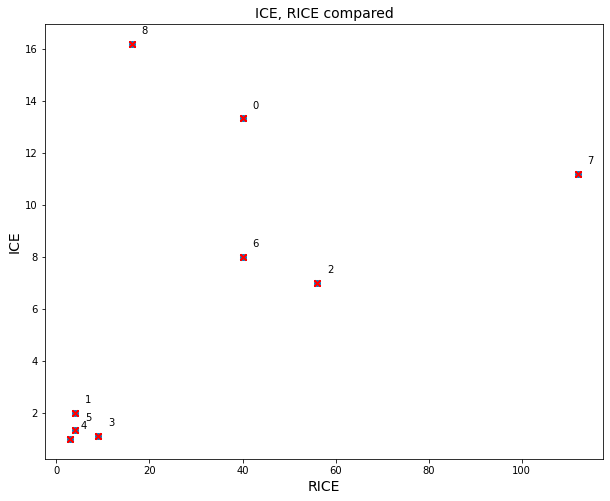

In [40]:
x = hypotheses['RICE'].values
y = hypotheses['ICE'].values
types = hypotheses.index.values
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y)
ax.set_xlabel('RICE', fontsize=14)
ax.set_ylabel('ICE', fontsize=14)
ax.set_title('ICE, RICE compared', fontsize=14)
for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

From the comparaison, we see that the `reach` parameter has a high influence on prioritizing hypothesis.
By thr ICE method, the 8th hypothesis had a low reach while by the RICE method, the 7th hypothesis has a high reach. 
It is better to promoter an hypothsis which may increase the number of visitors with a higher probability of conversion into purchases.

##  A/B Test Analysis

Befor heading to test the both group, we need to:
* Check duplicated by `date` and `group` in the `orders` table. If so, drop them and save the rest of the data in a new list `group_dates`. 
* creat an aggregated table of orders named `agg_orders` where:
    * each date and group have their own `transactionid`, `visitorid`
    * and sum the revenue for each date and group.
    * Represent the dates in ascending order.
* Creat an aggregated table of visits named `agg_visits` by the same method used previuosly to sum the number of visits per day and group.
* Creat a merged table named `data_cml` where we merge the `agg_orders` and `agg_visits` on date and group.
* Creat two filtered table named `group_a` and `group_b` from the `data_cml` where group_a will contain all informtion on group A and the same for group B.

In [41]:
orders[['date','group']].duplicated().sum()

1135

In [42]:
group_dates= orders[['date', 'group']].drop_duplicates()
group_dates

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [43]:
agg_orders = group_dates.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date': 'max',
                                           'group': 'max',
                                           'transactionid': pd.Series.nunique,
                                           'visitorid': pd.Series.nunique,
                                           'revenue': 'sum',}),axis=1,).sort_values(by=['date', 'group'])
agg_orders

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


In [44]:
agg_visits = group_dates.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'],visits['group'] == x['group'])]
                                       .agg({'date': 'max',
                                             'group': 'max',
                                             'visits': 'sum'}),axis=1,).sort_values(by=['date', 'group'])
agg_visits

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [45]:
data_cml = agg_orders.merge(agg_visits, left_on=['date', 'group'], right_on=['date', 'group'])

data_cml.columns = ['date','group','orders','buyers','revenue','visitors',]

data_cml

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [46]:
group_a = data_cml[data_cml['group'] == 'A']
group_a

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
2,2019-08-02,A,44,38,3860.3,1338
4,2019-08-03,A,68,62,5675.5,1845
6,2019-08-04,A,84,77,6822.1,2562
8,2019-08-05,A,109,100,8810.2,3318
10,2019-08-06,A,127,114,9600.0,3985
12,2019-08-07,A,145,131,11842.9,4629
14,2019-08-08,A,161,146,13373.3,5239
16,2019-08-09,A,177,159,16320.4,5856
18,2019-08-10,A,193,175,19608.6,6262


In [47]:
group_b = data_cml[data_cml['group'] == 'B']
group_b

,date,group,orders,buyers,revenue,visitors
1,2019-08-01,B,21,20,1620.0,713
3,2019-08-02,B,45,43,4243.8,1294
5,2019-08-03,B,61,59,6050.6,1803
7,2019-08-04,B,78,75,7767.9,2573
9,2019-08-05,B,101,98,9262.9,3280
11,2019-08-06,B,129,123,13069.3,3935
13,2019-08-07,B,153,146,16600.8,4644
15,2019-08-08,B,180,171,20088.6,5298
17,2019-08-09,B,205,193,22646.7,5908
19,2019-08-10,B,228,215,24367.1,6277


Now that we have divided our data into two groups - `group_a` and `group_b`, we can start our analysis:
* The cumulative revenue by group.
* The cumulative average order size by group.
* The relative difference in cumulative average order size of group B by group A.
* The conversion rate.
* Number of orders per user.
* The 95th and 99th percentiles for number of orders per user.
* A scatter chart of order prices.
* The 95th and 99th percentiles for order prices.
* Testing hypothesis in raw and filtered data - 
    * differnece in conversion rate
    * difference in order size

### Cumulative revenue by group

To find the cumulative revenue, we will creat a new column named `cml_revenue` where we will apply `.cumsum()` on the `revenue` column in `group_a` and `group_b` tables. And finely, we will plot a linear chart of the general revenue and teh cumulative revenue.

/tmp/ipykernel_160/832613836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['cml_revenue']=group_a['revenue'].cumsum()
/tmp/ipykernel_160/832613836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['cml_revenue']=group_b['revenue'].cumsum()


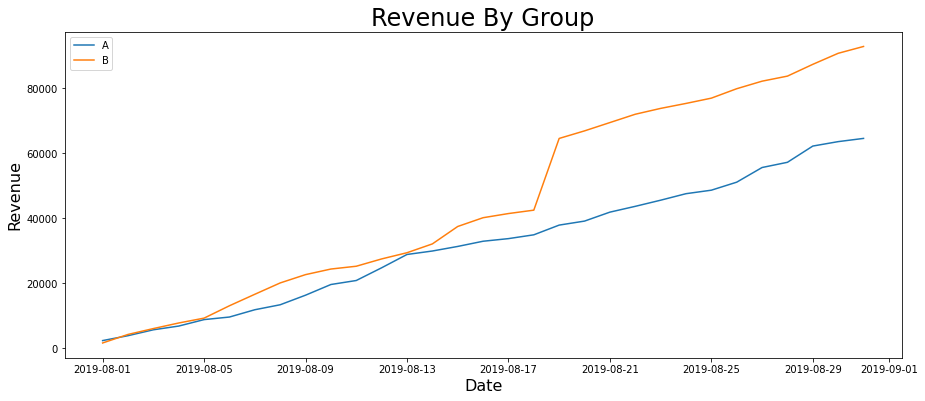

In [48]:
group_a['cml_revenue']=group_a['revenue'].cumsum()
group_b['cml_revenue']=group_b['revenue'].cumsum()
plt.rcParams["figure.figsize"] = (15,6)
plt.title('Revenue By Group', size=24)
plt.plot(group_a['date'], group_a['revenue'], label='A')
plt.plot(group_b['date'], group_b['revenue'], label='B')
plt.xlabel('Date', size=16)
plt.ylabel('Revenue', size=16)
plt.legend() 
plt.show()

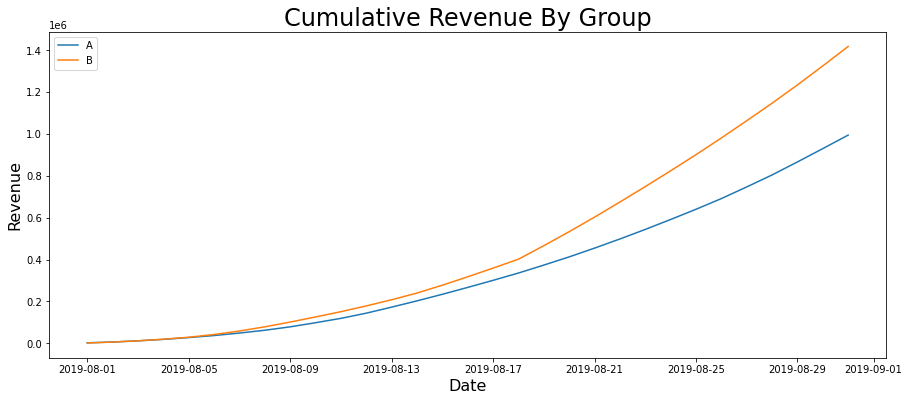

In [49]:
plt.rcParams["figure.figsize"] = (15,6)
plt.title('Cumulative Revenue By Group', size=24)
plt.plot(group_a['date'], group_a['cml_revenue'], label='A')
plt.plot(group_b['date'], group_b['cml_revenue'], label='B')
plt.xlabel('Date', size=16)
plt.ylabel('Revenue', size=16)
plt.legend() 
plt.show()

The revenue increases with time. We see a difference where group B has higher revenue from 17/08/2019.

### Cumulative average order size by group

To find the cumulative average order size, we will:
* creat a new column named `avg_order_size` by dividing the `revenue` by `orders` in `group_a` and `group_b` tables and represent it in a linear chart.
* creat a new column named `cml_avg_order_size` by dividing the `cml_revenue` by `orders` in `group_a` and `group_b` tables and represent it in a linear chart.

/tmp/ipykernel_160/2178787152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['avg_order_size']=group_a['revenue']/group_a['orders']
/tmp/ipykernel_160/2178787152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['avg_order_size']=(group_b['revenue'])/(group_b['orders'])


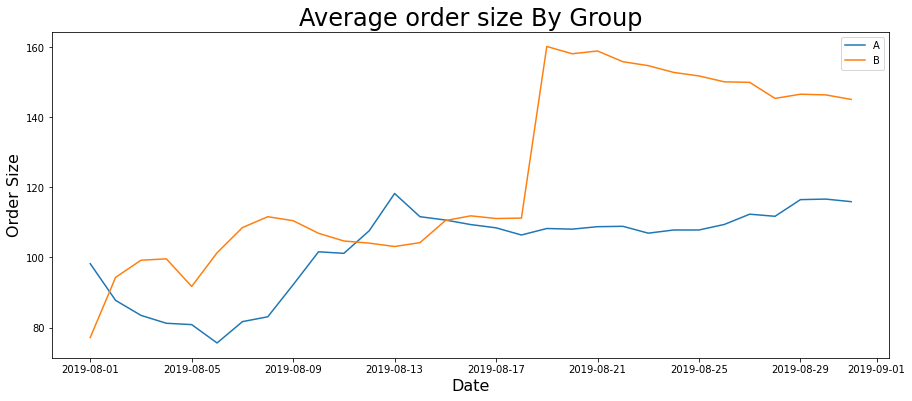

In [50]:
group_a['avg_order_size']=group_a['revenue']/group_a['orders']
group_b['avg_order_size']=(group_b['revenue'])/(group_b['orders'])
plt.rcParams["figure.figsize"] = (15,6)
plt.title('Average order size By Group', size=24)
plt.plot(group_a['date'], group_a['avg_order_size'], label='A')
plt.plot(group_b['date'], group_b['avg_order_size'], label='B')
plt.xlabel('Date', size=16)
plt.ylabel('Order Size', size=16)
plt.legend() 
plt.show()

In [51]:
print('The average order size of group A from 13/08/2019 is:',group_a.query('date>="2019-08-13"')['avg_order_size'].mean())
print('The average order size of group B untill 18/08/2019 is:',group_b.query('date<"2019-08-18"')['avg_order_size'].mean())
print('The average order size of group B from 18/08/2019 is:',group_b.query('date>="2019-08-18"')['avg_order_size'].mean())

The average order size of group A from 13/08/2019 is: 110.71615661106657
The average order size of group B untill 18/08/2019 is: 102.95290546996785
The average order size of group B from 18/08/2019 is: 149.0487401110933


/tmp/ipykernel_160/2823319328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['cml_avg_order_size']=group_a['cml_revenue']/group_a['orders']
/tmp/ipykernel_160/2823319328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['cml_avg_order_size']=(group_b['cml_revenue'])/(group_b['orders'])


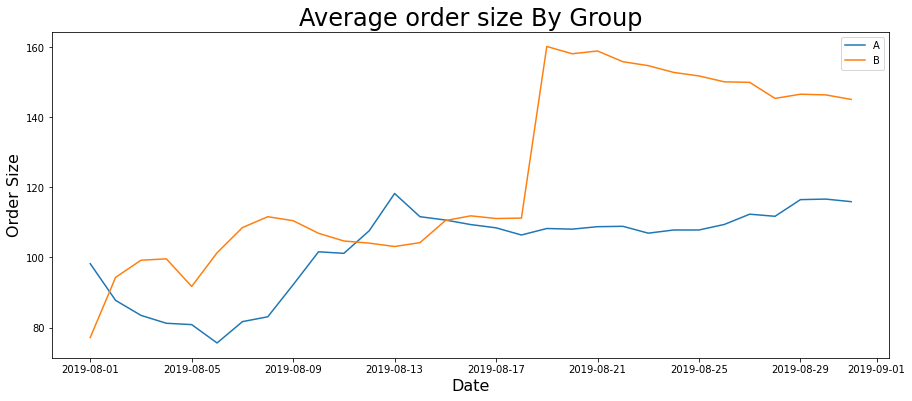

In [52]:
group_a['cml_avg_order_size']=group_a['cml_revenue']/group_a['orders']
group_b['cml_avg_order_size']=(group_b['cml_revenue'])/(group_b['orders'])
plt.rcParams["figure.figsize"] = (15,6)
plt.title('Average order size By Group', size=24)
plt.plot(group_a['date'], group_a['avg_order_size'], label='A')
plt.plot(group_b['date'], group_b['avg_order_size'], label='B')
plt.xlabel('Date', size=16)
plt.ylabel('Order Size', size=16)
plt.legend() 
plt.show()

From 01/08/2019 untill 11/08/2019, the average purchage size of group B is higher than group A.
From 13/08/2019, the average purchage size of group is stable and equal on average to 110.
From 18/08/2019, group B has an spike in the average order size - from 102 to 150.

### Relative difference in cumulative average order size for group B compared with group A

To find the relative difference in cumulative average order size of group B compared with group A, we will merge into a new table named `merged_cml_order_size` the tables `group_a` on `group_b` on the date and plot a linear chart of the data when we divide the cumulative average order size of group B by the cumulative average order size of group A.

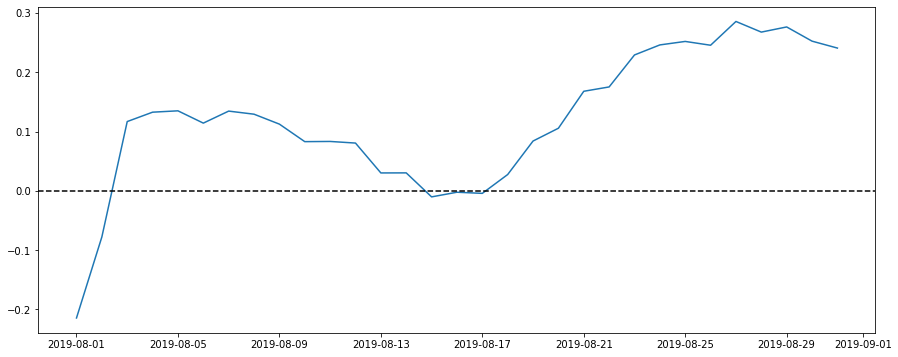

In [53]:
merged_cml_order_size = group_a.merge(group_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(merged_cml_order_size['date'], (merged_cml_order_size['cml_avg_order_sizeB'])/(merged_cml_order_size['cml_avg_order_sizeA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

As previous, group B has higher order size until 13/08/2019 and from 17/08/2019( shown as a positive value).

### Conversion rate

To find the conversion rate, we will a new column namwd `conversion` by dividing the number of orders by the number of users in each `group_a` and ` group_b` tables and then representing a linear chart of the variables. And then, we will check the relative difference in conversion rate of group B in comparaison to group A by creating a merged table named `merged_conversion` in the same way we checked in previous step.


/tmp/ipykernel_160/237709160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['conversion']=group_a['orders']/group_a['visitors']
/tmp/ipykernel_160/237709160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['conversion']=group_b['orders']/group_b['visitors']


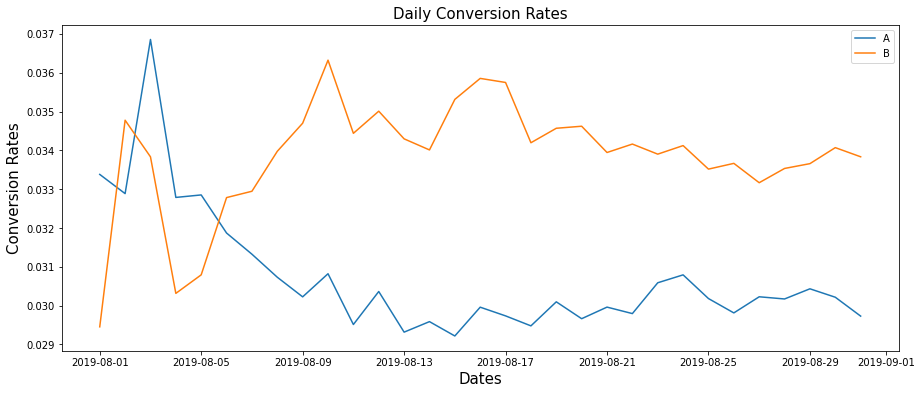

In [54]:
group_a['conversion']=group_a['orders']/group_a['visitors']
group_b['conversion']=group_b['orders']/group_b['visitors']
plt.rcParams["figure.figsize"] = (15,6)
plt.title('Daily Conversion Rates',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':15})
plt.ylabel('Conversion Rates',fontdict={'size':15})
plt.plot(group_a['date'], group_a['conversion'], label='A')
plt.plot(group_b['date'], group_b['conversion'], label='B')
plt.legend()
plt.show()

In [55]:
print('The Average conversion rate of group A is:',group_a.query('date>="2019-08-05"')['conversion'].mean())
print('The Average conversion rate of group B is:',group_b.query('date>="2019-08-05"')['conversion'].mean())

The Average conversion rate of group A is: 0.03024644704780599
The Average conversion rate of group B is: 0.03411636751309787


Untill 05/08/2019, group A has a higher conversion rate than group B.
After 05/08/2019, the conversion rate looks stable when -
* group A has a conversion rate of 0.030
* group B has a conversion rate of 0.034

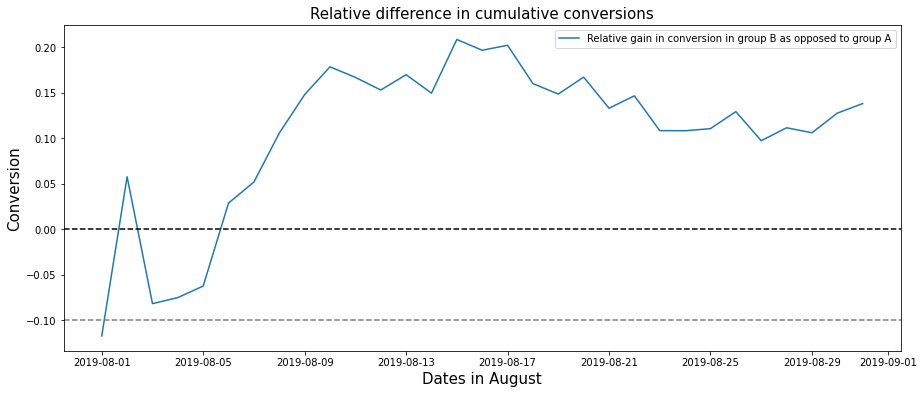

In [56]:
merged_conversion = group_a[['date','conversion']].merge(group_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(merged_conversion['date'], merged_conversion['conversionB']/merged_conversion['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()
plt.title('Relative difference in cumulative conversions',fontdict={'size':15})
plt.xlabel('Dates in August',fontdict={'size':15})
plt.ylabel('Conversion',fontdict={'size':15})

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');

As shown priviously,we see an anomaly in the data until 05/08/2019. And then group B has higher conversion rate than group A due to the fact that the ratio is positive.

### Number of orders per user

To find to number of orders per user, we will:
* creat a new table named `orders_per_user` which will contain for each visitorid, the number of transactionid.
* sort the number of order by descending order.
* represent it scatter chart.

       visitorid  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
...          ...     ...
359   1484903144       1
360   1485964287       1
361   1494664757       1
362   1495112755       1
1030  4283872382       1

[1031 rows x 2 columns]
1.1610087293889428
count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64


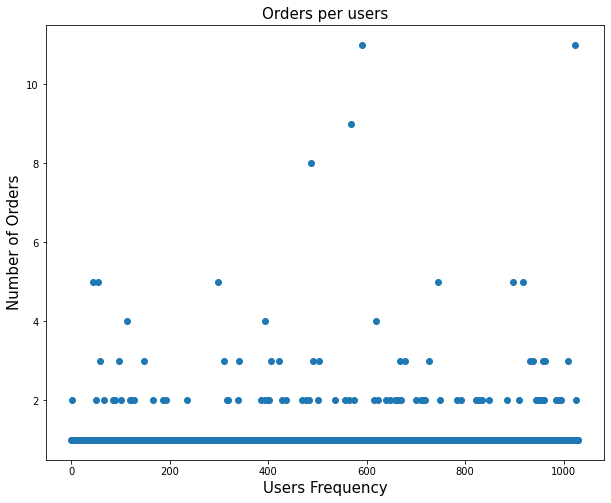

In [57]:
orders_per_user = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
orders_per_user.columns = ['visitorid','orders']
print(orders_per_user.sort_values(by='orders',ascending=False))
print(orders_per_user['orders'].mean())
print(orders_per_user['orders'].describe())
x_values = pd.Series(range(0,len(orders_per_user)))
plt.figure(figsize=(10,8))
plt.title('Orders per users',fontdict={'size':15})
plt.xlabel('Users Frequency',fontdict={'size':15})
plt.ylabel('Number of Orders',fontdict={'size':15})
plt.scatter(x_values,orders_per_user['orders'] );

Most users had 1, 2 or orders. We see that there are user who have more than 5 orders. We can consider them as outliers.

###  95th and 99th percentiles for the number of orders per user

To find the 95th and the 99th, we will use the `np.percentile()` method on the number of transcationsid in `orders_per_user` table. It will represent the upper outliers.

In [58]:
print(np.percentile(orders_per_user['orders'], [95, 99]))

[2. 4.]


In [59]:
len(orders_per_user.query('orders>=2'))/len(orders_per_user)

0.09117361784675072

As concluded before, users that had more than 4 orders are considered as outlieres users. This abnormality is 9% of the data. Therefore, we can drop those users

### Scatter chart of order prices

We will represent a scatter chart of the `revenue` column in the `orders` table.

131.49164578111947
count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64


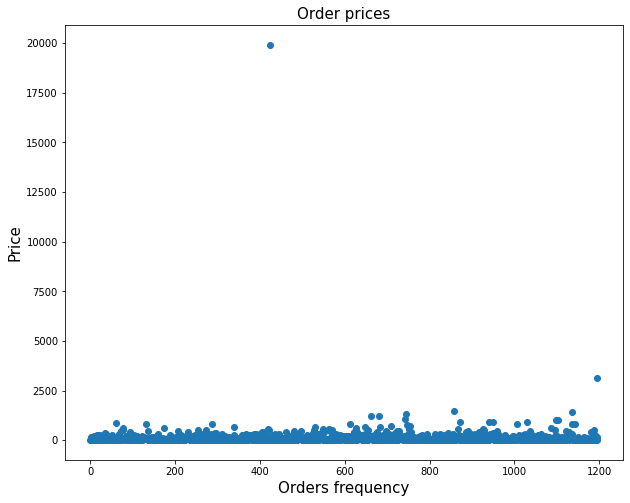

In [60]:
print(orders['revenue'].mean())
print(orders['revenue'].describe())
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,8))
plt.title('Order prices',fontdict={'size':15})
plt.xlabel('Orders frequency',fontdict={'size':15})
plt.ylabel('Price',fontdict={'size':15})
plt.scatter(x_values,orders['revenue']) ;

Most orders prices are less than 2500. It looks like there several orders with 20000 price tag.

### 95th and 99th percentiles of order prices

We will use the same methos used in previous steps on the `revenue` column of the `orders` table.

In [61]:
print(np.percentile(orders['revenue'], [ 95, 99])) 

[435.54  900.904]


In [62]:
len(orders[(orders['revenue']>=436)])/len(orders)

0.04928989139515455

The upper price oulier is less 5%. we can drop them.

### Test the hypothesis

To test the hypithesis, we will use a predifined function named `testing_average` with the following condition:
* the alpha is equal to 0.05
* checking equality of variance in both sample by p_levene
    * if the variance are inequal, the parameter equal is to False.
    * if the variance are inequal, the parameter equal is to True.
* perform Shapiro-Wilk test if p_norm>p_alpha.
* If else, perform the Mann-Whitney U test.
* print the samples size and the p_value.
* print - Reject or Failed to reject H0.

In [63]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
                                                            
    print('Size of sample1:', len(sample1))
    print('Size of sample2:', len(sample2))
    print('the p_value is:',p_value)
    if p_value<alpha:
        print('Reject H0 and accept H1')
    else:
        print('Fail to Reject H0 and do not have enough evidence to accept H1')

#### Statistical significance of the difference in conversion 

The first hypothesis is:
* H0: There is no statistically significant difference in conversion between the groups
* H1: There is statistically significant difference in conversion between the groups

we will test the hypothesis in raw data and in filetered data where we exclude the 95th percentile of number of orders and the order size.

##### in raw data

To find the samples to be rested, we will:
* created two list `ordersA` and `ordersB` which will contain for eacxh group the number of transactionid for each visitorid.
* creat a pd.Series named `sampleA` and `sampleB` which will contain the number of orders with users that did not order anything.
* apply the `testing_average` function on the samples.
* print the relative conversion rate in group B in comparaion to group A.

In [64]:
ordersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersA.columns = ['visitorId', 'orders']

ordersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersA['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersB['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersB['orders'])), name='orders')], axis=0)

testing_average(sampleA,sampleB,alpha=0.05)

print('Relative conversion gain:'"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

Size of sample1: 18736
Size of sample2: 18916
the p_value is: 0.016792355056752608
Reject H0 and accept H1
Relative conversion gain:0.138


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The null hypothesis is rejected and the alternative is asccpeted - `There is statistically significant difference in conversion between the groups in the raw data`. The p_value is less than the alpha. Even though that the sample sizes are almost the same, the relavitve mean conversation rate of group B is positively bigger than mean conversion rate of group A.

##### in filtered data

To test the filtered, we will:
* create a table `abnornal_orders` which will contain users that made more than 2 transaction per visit.
* create a table `expensive_orders` which will contain orders size over 436.
* create a merged table named `abnormal_users` with no duplicated.
* print the number of abnormal users.
* create pd.Series named `sampleC` and `sampleD` without the abnormal users.
* apply `test_average` on `sampleC` and `sampleD`
* print the relative average conversion rate of group B in comparsion to group A.

In [65]:
abnornal_orders = pd.concat([ordersA[ordersA['orders'] > 2]['visitorId'], ordersB[ordersB['orders'] > 2]['visitorId']], axis=0)

expensive_orders = orders[orders['revenue'] >436]['visitorid']

abnormal_users = pd.concat([abnornal_orders, expensive_orders], axis=0).drop_duplicates().sort_values()

print('Number of abnormal users: ', abnormal_users.shape[0])

sampleC = pd.concat([ordersA[np.logical_not(ordersA['visitorId'].isin(abnormal_users))]['orders'], 
                             pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - 
                                                          len(ordersA['orders'])), name='orders')], axis=0)

sampleD = pd.concat([ordersB[np.logical_not(ordersB['visitorId'].isin(abnormal_users))]['orders'], 
                             pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - 
                                                          len(ordersB['orders'])), name='orders')], axis=0)


Number of abnormal users:  73


In [66]:
testing_average(sampleC,sampleD,alpha=0.05)
print('Relative order size gain:'"{0:.3f}".format(sampleD.mean()/ sampleC.mean()- 1))

Size of sample1: 18691
Size of sample2: 18869
the p_value is: 0.01428436196480213
Reject H0 and accept H1
Relative order size gain:0.170


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We have 73 abnormal users. Both sample size have dicreased. The p_value is lower than alpha but is higher in comparsion to the raw data. Never the less, we rejected the null hypothesis and accepted the alternative hypothesis - `There is statistically significant difference in conversion between the groups`. Group B still have a positively bigger average conversion rate than group A.

####  Statistical significance of the difference in average order size

The second hypotheses is:
* H0: There is no statistically significant difference in average order size between the groups
* H1: There is statistically significant difference in average order size between the groups
We will test the hypothesis in raw data and in filetered data where we exclude the 95th percentile of number of orders and the order size.

##### in raw data

To test the raw data, we will:
* create two samples named `sampleE` and `sampleF` which will filtered representatively group A or group B and contain only the `revenue` column.
* apply the `testing_average` function on the 2 samples. 
* print the relative mean revenue size of group B in comparsion to group A.

In [67]:
sampleE = orders[orders['group'] == 'A']['revenue']
sampleF = orders[orders['group'] == 'B']['revenue']
testing_average(sampleE,sampleF,alpha=0.05)
print('Relative order size gain:'"{0:.3f}".format(sampleF.mean()/ sampleE.mean()- 1))

Size of sample1: 557
Size of sample2: 640
the p_value is: 0.6915246773264736
Fail to Reject H0 and do not have enough evidence to accept H1
Relative order size gain:0.252


The sample size of group B is bigger than group A. The p_values is bigger than alpha. We failed to reject the null hypothesdis and do not have enough evidence to accept the null hypothesis - there might be some similarity in both samples. The average revenue size of group be id positivly higher than group B.

##### in filtered data

To test the filtered table, we will:
* create two samples named `sampleG` and `sampleH` where the abnormal users are excluded.
* apply the testing_average function on the 2 samples.
* print the relative mean revenue size of group B in comparsion to group A.

In [68]:
sampleG= orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue']
sampleH= orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue']
testing_average(sampleG,sampleH,alpha=0.05)
print('Relative order size gain:'"{0:.3f}".format(sampleH.mean()/sampleG.mean()-1))     

Size of sample1: 474
Size of sample2: 560
the p_value is: 0.743836016813833
Fail to Reject H0 and do not have enough evidence to accept H1
Relative order size gain:-0.028


In both case, the samples size have dicreased. The p_values is bigger than alpha and even bigger than in the raw data. We failed to rejest the bull hypothesis and do no have enough evidence to accept rthe alternative hypothesis. But in this case, the relative mean revenue size of group B is negatively lower than group A.

## Conclusions

For the analysis, we had to: 
* maximize the column widht of the table to 400.
* upload the `hypothesis` data when the seperator sin is ";".
* upload the variables of date column in `visits` and `orders` as a datetime type.
* change the column letters to lowercase to simplify our work.

Our prioritized hypothesis are:
* By ICE - `Launch a promotion that gives users discounts on their birthdays` 
* By RICE - `Add a subscription form to all the main pages. This will help you compile a mailing list` 
* The difference between ICE vs RICE is the reach parameter - which will effect on number of visitor.

Before the A/B test analysis, we conclude that:
* The cumulative revenue of group B is higher espcialy from 17/08/2019.
* The cumulative average order size is:
    * up to 18/08/2019, group A has higher cumulative average order size than group B.
    * from 18/08/2019, group B has higher cumulative average order size than group A.
* The relative difference in cumulative average order size of group B in comparison to group A is:
    * negative untill 03/08/2019.
    * equal in 17/08/2019.
    * positive in other dates.
* The conversion rate for group B is higher than group A. especially from 06/08/2019.
* The average number of orders per user is 1.16. Most users made one order but there are abnormals user that made servel per user. The upper outlier/ the 9th percentile is 4 orders per users.
* The average revenue size is 130. Most users make order under 2500. But we have upper outlier/ the 95th percentile is 435.

From the A/B testing, we can conclude that :
* the first hypothesis - statistical difference in converasion rate - 
    * We reject the null hypothesis and accepted the alternative hypothesis - there is a statistical difference in conversion rate between two groups.
    * The filtered data has less difference that the raw data. 
    * Group B has a higher average converson rate than group A.
* the secind hypothesis - statistical difference in order size - 
    * We cannot reject the null hypothesis or have enough evidence to accept the alternative hypothesis.
    * The filered datas have more similarity to each. 
    * When the data is raw, group B has a higher average order size than group B. When the data is filtered, group B has a lower average order size than group A.
    
Finelly, if the test was to check the number of order size due to the promotion of birthday discounts, continue the test because we do not have enough data to properly compare between orders. And if the test was to check number od users by subscription promotion therefore conversion rate, then stop the test because group B is the leader. 